## Importando bibliotecas

In [34]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import sys
from util import *
import gc
import pickle

import warnings

# Ignorar todos os warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [35]:
df = pd.read_csv("../data/tb_crm_clientes.csv")
display(df.head(10))

,IDCliente,AnoDeNascimento,NivelDeEducacao,EstadoCivil,RendaAnualFamiliar,QtdDeCriancasNaCasa,QtdDeAdolescentesNaCasa,DataDeInscricao,DiasDesdeUltimaCompra,GastoComVinhoNosUltimos2Anos,GastoComFrutasNosUltimos2Anos,GastoComCarneNosUltimos2Anos,GastoComPeixeNosUltimos2Anos,GastoComDocesNosUltimos2Anos,GastoComOuroNosUltimos2Anos,ComprasComDesconto,ComprasNoWeb,ComprasPorCatalogo,ComprasNaLoja,VisitasAoSiteNoUltimoMes,AceitouCampanha3,AceitouCampanha4,AceitouCampanha5,AceitouCampanha1,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha
0,5524,1957,Graduação,Solteiro(a),58138.0,0,0,2021-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduação,Solteiro(a),46344.0,1,1,2023-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduação,União Estável,71613.0,0,0,2022-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduação,União Estável,26646.0,1,0,2023-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Doutorado,Casado(a),58293.0,1,0,2023-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Mestrado,União Estável,62513.0,0,1,2022-09-09,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduação,Divorciado(a),55635.0,0,1,2021-11-13,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,Doutorado,Casado(a),33454.0,1,0,2022-08-05,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,Doutorado,União Estável,30351.0,1,0,2022-06-06,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,Doutorado,União Estável,5648.0,1,1,2023-03-13,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [36]:

df = pd.read_csv("../data/tb_crm_clientes.csv")

df = df[df["AnoDeNascimento"] >= 1940]

## Criando variável Aceitou Alguma Campanha

In [37]:
df['AceitouAlgumaCampanha'] = df[['AceitouCampanha1', 'AceitouCampanha2', 'AceitouCampanha3', 'AceitouCampanha4', 'AceitouCampanha5', 'AceitouUltimaCampanha']].any(axis=1).astype(int)

## Entendimento dos dados e do target

In [38]:
df.shape

(2237, 30)

In [39]:
metadados = generate_metadata(df=df, ids=['IDCliente'], targets=['AceitouAlgumaCampanha'], orderby='PC_NULOS')
display(metadados)

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,RendaAnualFamiliar,Explicativa,24,1.07,1971,float64
1,IDCliente,ID,0,0.00,2237,int64
2,AnoDeNascimento,Explicativa,0,0.00,56,int64
3,NivelDeEducacao,Explicativa,0,0.00,5,object
4,EstadoCivil,Explicativa,0,0.00,8,object
5,QtdDeCriancasNaCasa,Explicativa,0,0.00,3,int64
6,QtdDeAdolescentesNaCasa,Explicativa,0,0.00,3,int64
7,DataDeInscricao,Explicativa,0,0.00,663,object
8,DiasDesdeUltimaCompra,Explicativa,0,0.00,100,int64
9,GastoComVinhoNosUltimos2Anos,Explicativa,0,0.00,775,int64


## Feature Engineering

In [40]:
from datetime import datetime

data_atual = datetime.today()

# Criando a variável 'Idade'
df['Idade'] = 2020 - df['AnoDeNascimento']

# Ajustando o tipo da variável DataDeInscricao
df['DataDeInscricao'] = pd.to_datetime(df['DataDeInscricao'])

# Calculando a quantidade de dias desde a inscrição
df['DiasDesdeInscricao'] = (data_atual - df['DataDeInscricao']).dt.days

# Criar uma variável contando a quantidade de pessoas na residência de cada cliente
def calcular_total_pessoas(row):
    if row['EstadoCivil'] == 'Casado(a)' or row['EstadoCivil'] == 'União Estável':
        return row['QtdDeCriancasNaCasa'] + row['QtdDeAdolescentesNaCasa'] + 2
    else:
        return row['QtdDeCriancasNaCasa'] + row['QtdDeAdolescentesNaCasa'] + 1

# Aplicando a função para calcular a quantidade total de pessoas na casa
df['TotalPessoasNaCasa'] = df.apply(calcular_total_pessoas, axis=1)

# Calcular a renda per capita familiar
df['RendaAnualPerCapitaFamiliar'] = df['RendaAnualFamiliar'] / df['TotalPessoasNaCasa']

# Calular total de compras
df['TotalCompras'] = df['ComprasComDesconto'] + df['ComprasNoWeb'] + df['ComprasPorCatalogo'] + df['ComprasNaLoja']

# Calcular a frequência de compras (total de compras por dia desde a inscrição)
df['Frequencia'] = df['TotalCompras'] / df['DiasDesdeInscricao']

# Calcular o valor total gasto com produtos
df['ValorTotal'] = df['GastoComVinhoNosUltimos2Anos'] + df['GastoComFrutasNosUltimos2Anos'] + df['GastoComCarneNosUltimos2Anos'] + df['GastoComPeixeNosUltimos2Anos'] + df['GastoComDocesNosUltimos2Anos'] + df['GastoComOuroNosUltimos2Anos']

# Calcular o valor médio gasto por compra
df['Ticket_Medio'] = df['ValorTotal'] / df['TotalCompras'].replace(0, np.nan)

In [41]:
metadados = generate_metadata(df=df, ids=['IDCliente'], targets=['AceitouAlgumaCampanha'], orderby='PC_NULOS')
display(metadados)

,FEATURE,USO_FEATURE,QT_NULOS,PC_NULOS,CARDINALIDADE,TIPO_FEATURE
0,RendaAnualFamiliar,Explicativa,24,1.07,1971,float64
1,RendaAnualPerCapitaFamiliar,Explicativa,24,1.07,1981,float64
2,Ticket_Medio,Explicativa,4,0.18,1501,float64
3,NivelDeEducacao,Explicativa,0,0.00,5,object
4,AnoDeNascimento,Explicativa,0,0.00,56,int64
5,IDCliente,ID,0,0.00,2237,int64
6,QtdDeCriancasNaCasa,Explicativa,0,0.00,3,int64
7,EstadoCivil,Explicativa,0,0.00,8,object
8,QtdDeAdolescentesNaCasa,Explicativa,0,0.00,3,int64
9,DataDeInscricao,Explicativa,0,0.00,663,datetime64[ns]


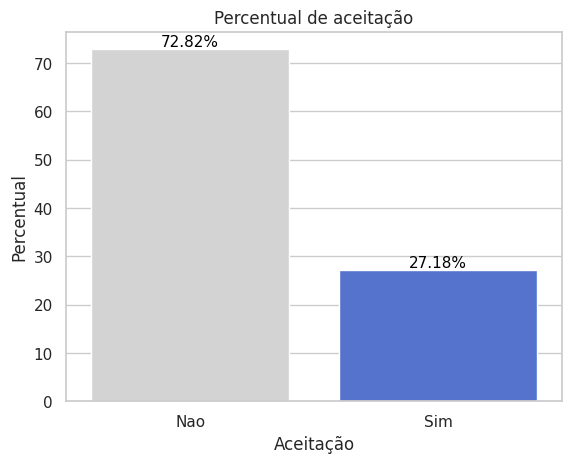

In [42]:
### Entendimento da variável resposta
aceitacao_counts = df['AceitouAlgumaCampanha'].value_counts()

# Calculando percentuais de churn
percent_n = (aceitacao_counts[0] / len(df)) * 100
percent_s = (aceitacao_counts[1] / len(df)) * 100

# Criando dataframe
total_por_target = pd.DataFrame({'target': ['Nao', 'Sim'], 'Percentual': [percent_n, percent_s]})

#Definição de cores
cores = {'Nao': 'lightgrey', 'Sim': 'royalblue'}

# Plot do gráfico
ax = sns.barplot(x='target', y='Percentual', hue='target', data=total_por_target, palette=cores, dodge=False)

# Adicionando valores de cada barra
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Aceitação')
plt.ylabel('Percentual')
plt.title('Percentual de aceitação')
plt.show()

In [43]:
df2 = df.copy()
df2 = df2.drop(columns=['IDCliente', 'AceitouCampanha1', 'AceitouCampanha2', 'AceitouCampanha3', 'AceitouCampanha4', 'AceitouCampanha5', 'AceitouUltimaCampanha', 'DiasDesdeInscricao', 'DataDeInscricao'])

🔹 Análise Univariada - Variáveis Categóricas


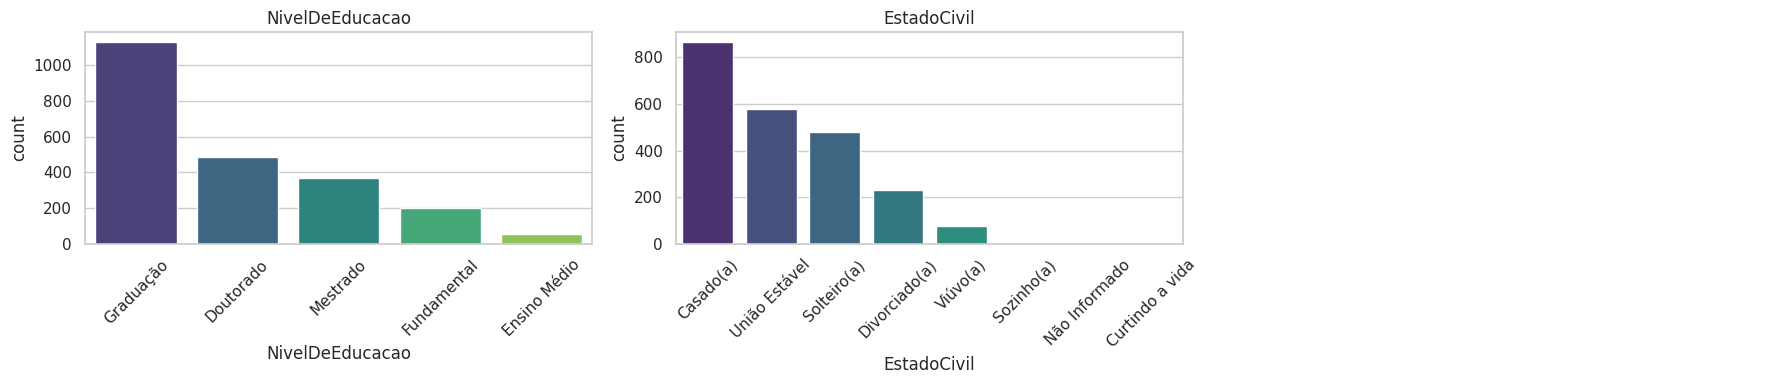

🔹 Análise Univariada - Variáveis Numéricas


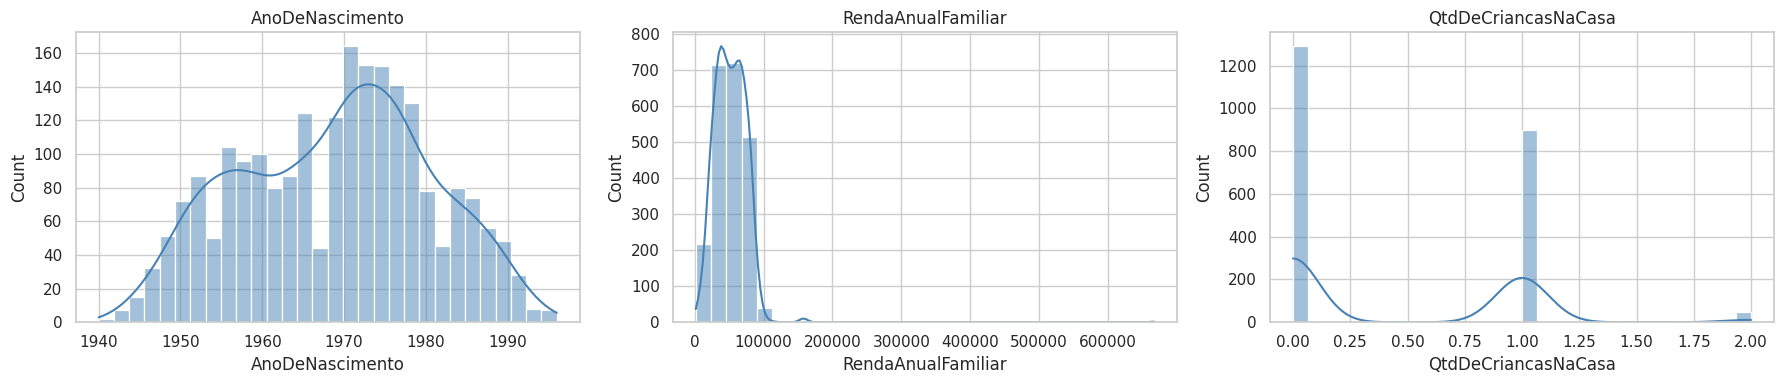

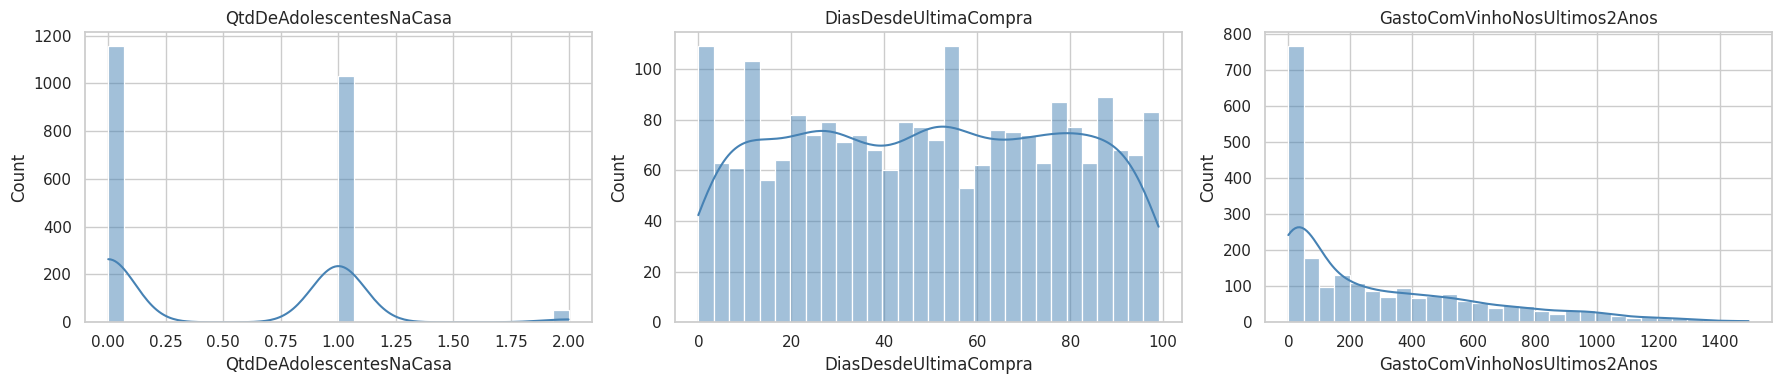

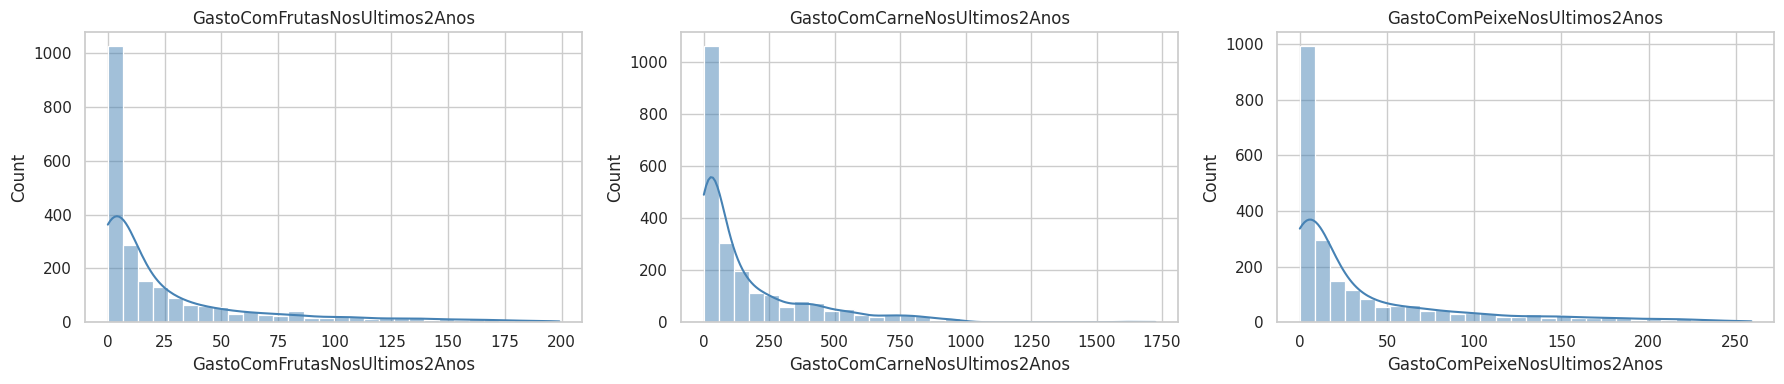

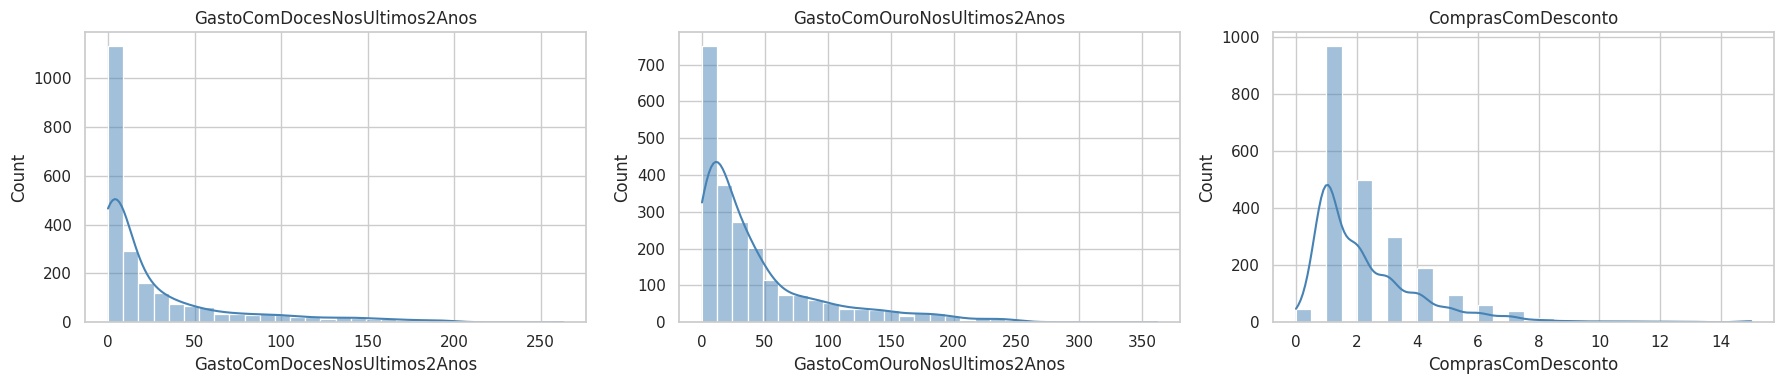

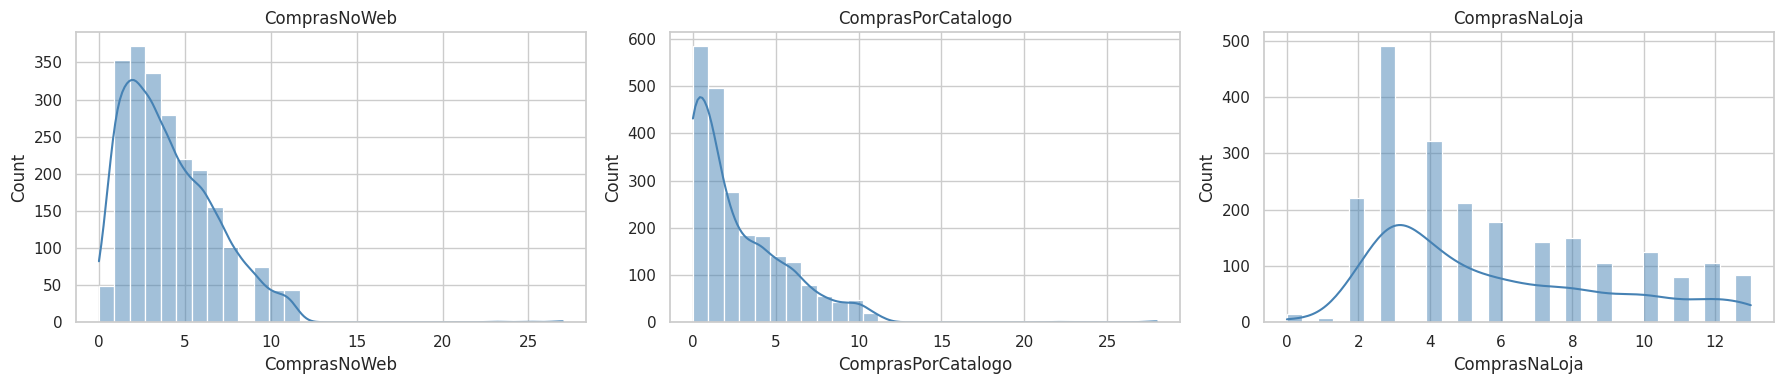

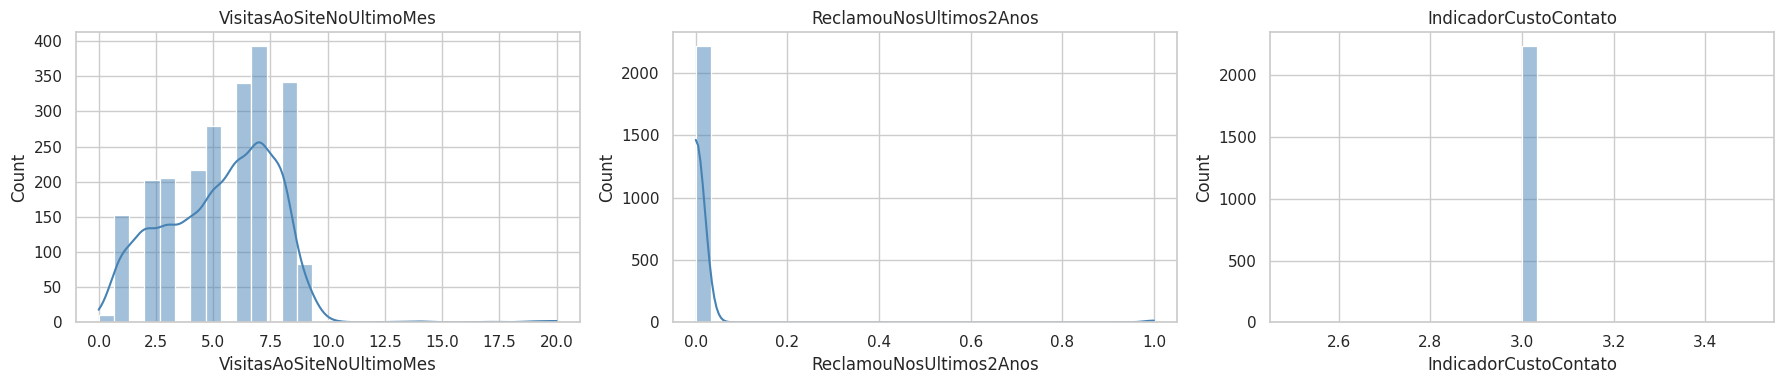

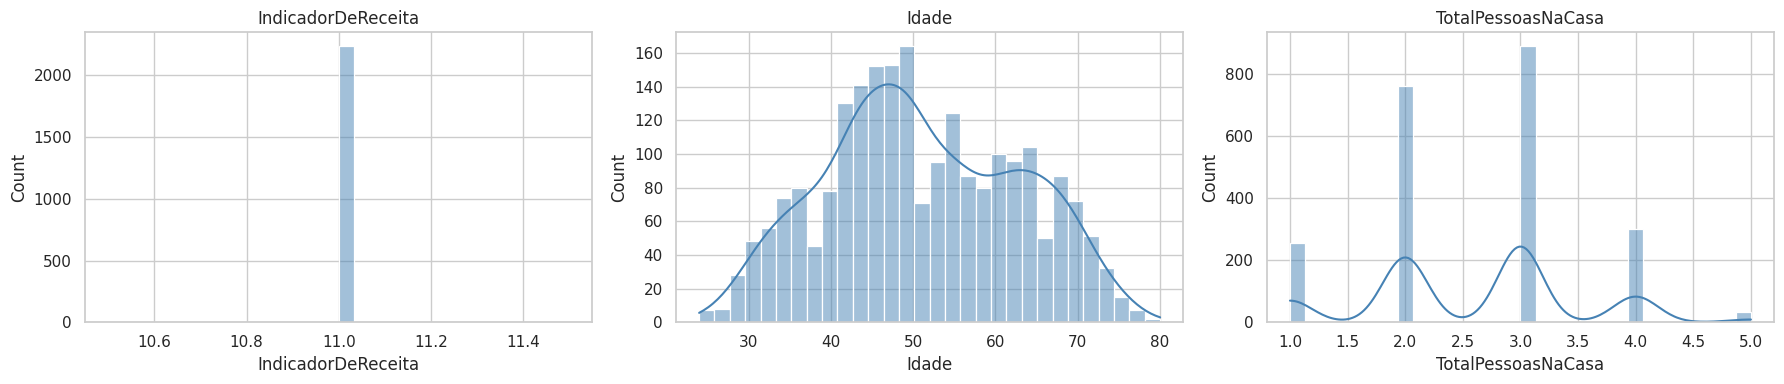

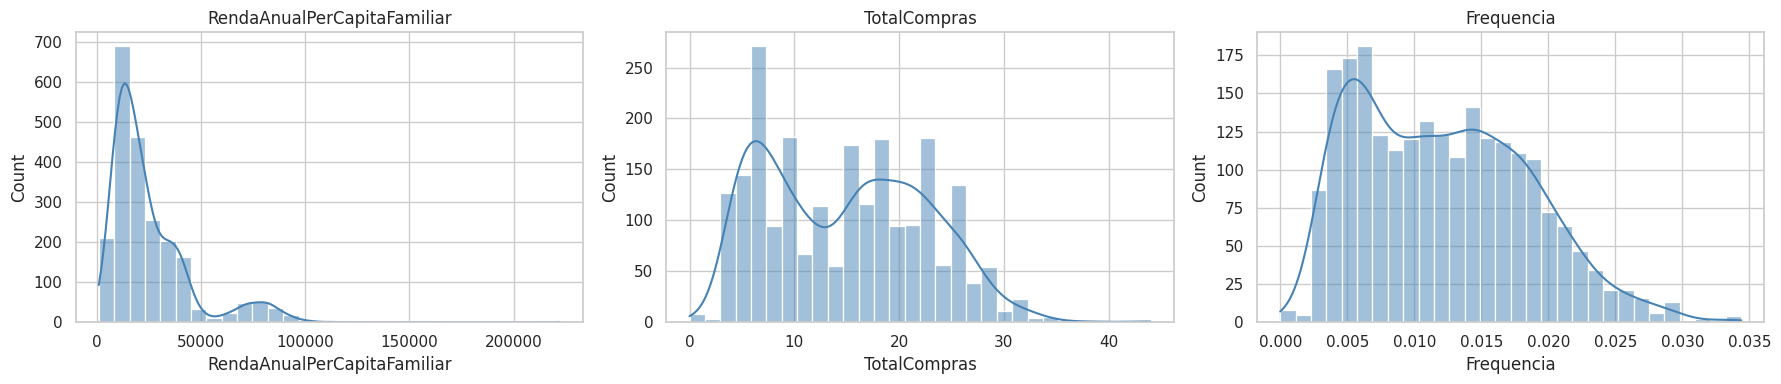

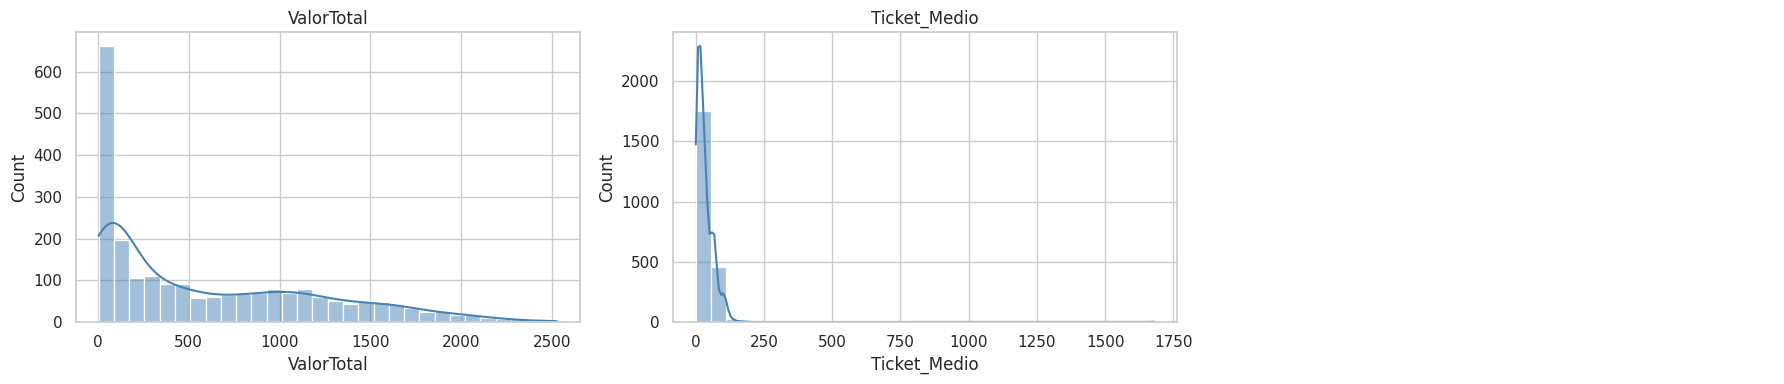

🔹 Análise Bivariada - Variáveis Categóricas vs Alvo


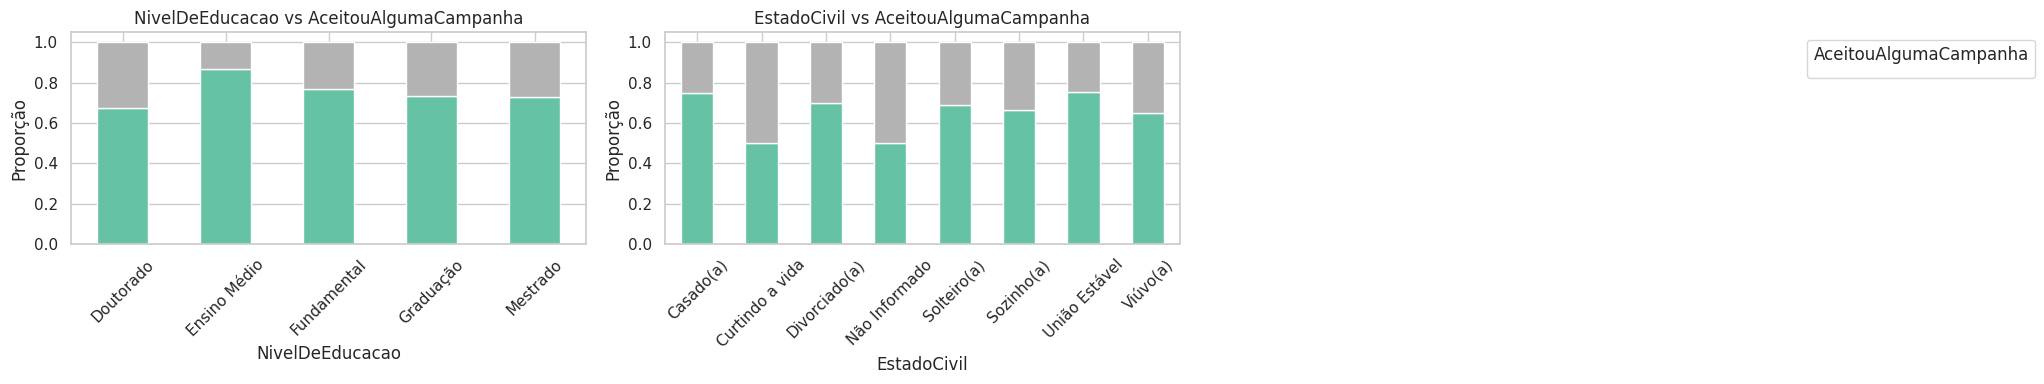

🔹 Análise Bivariada - Variáveis Numéricas vs Alvo


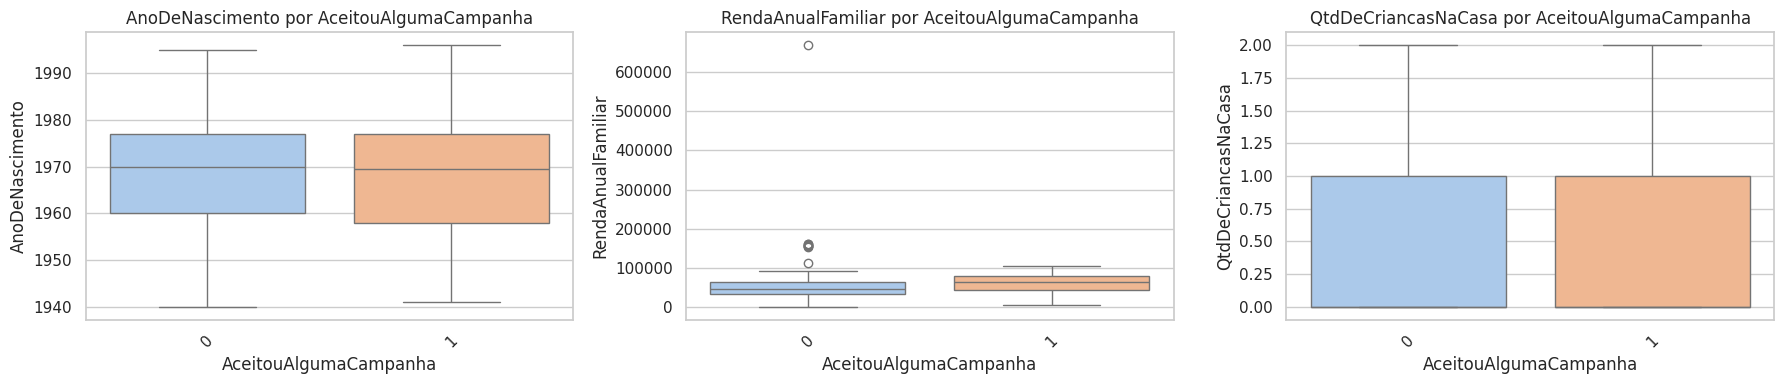

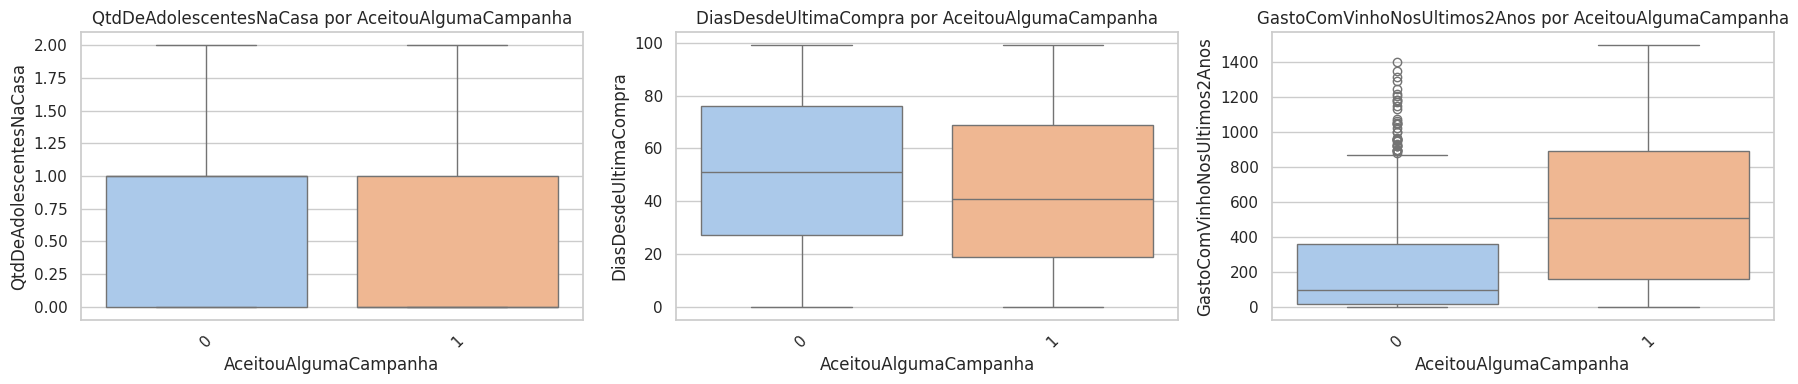

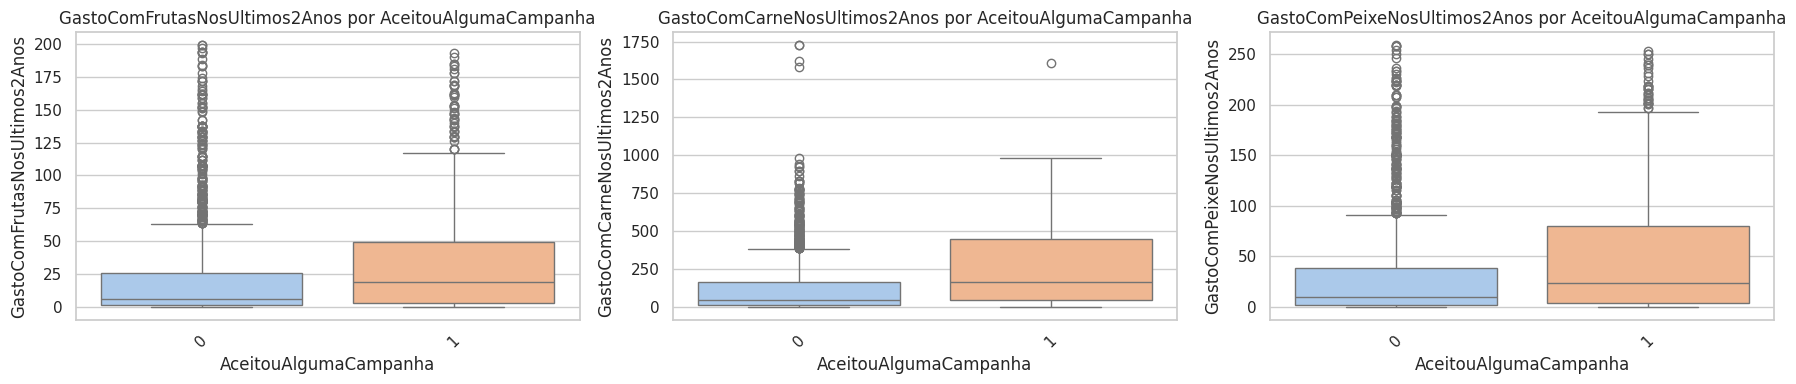

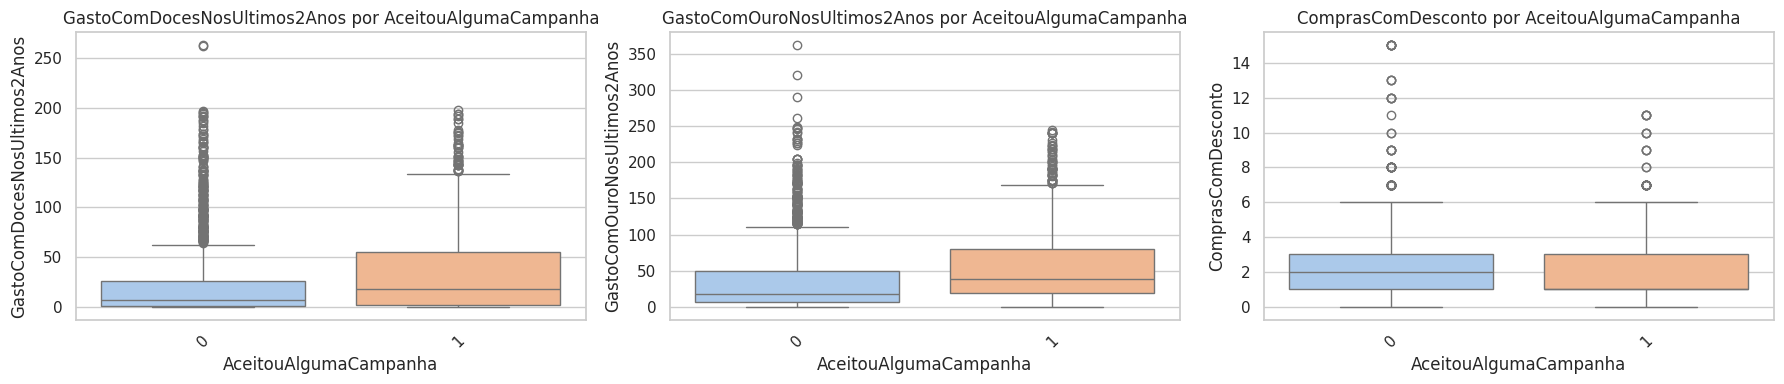

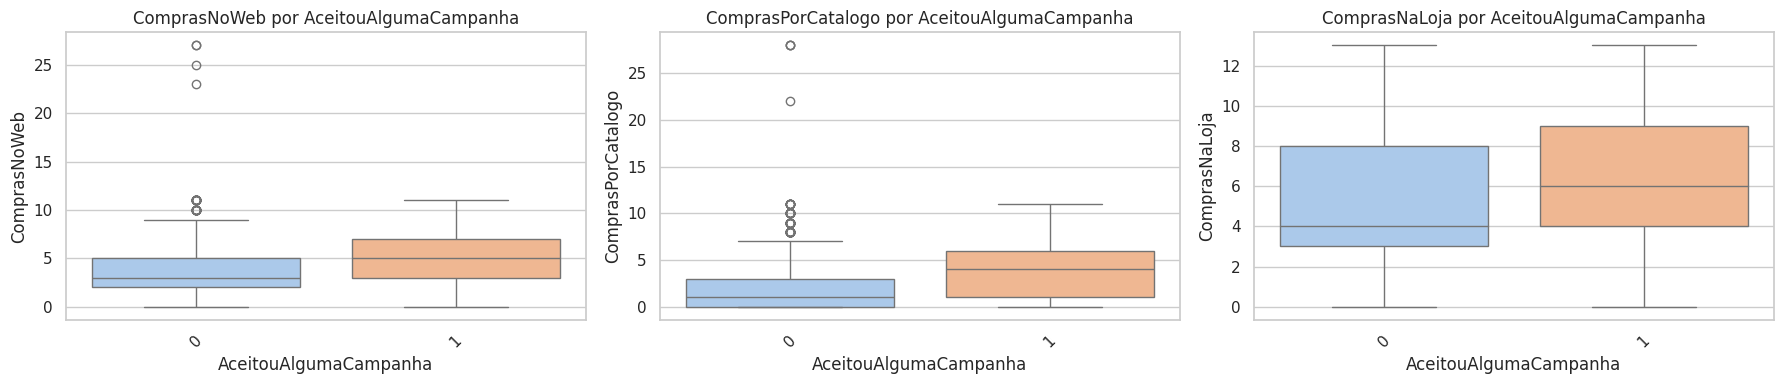

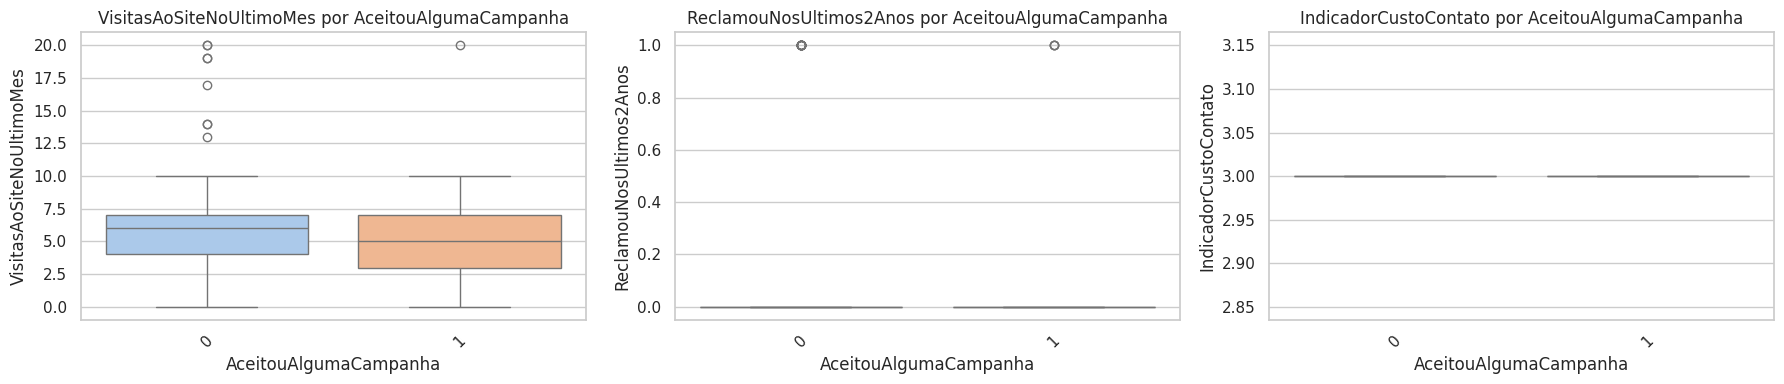

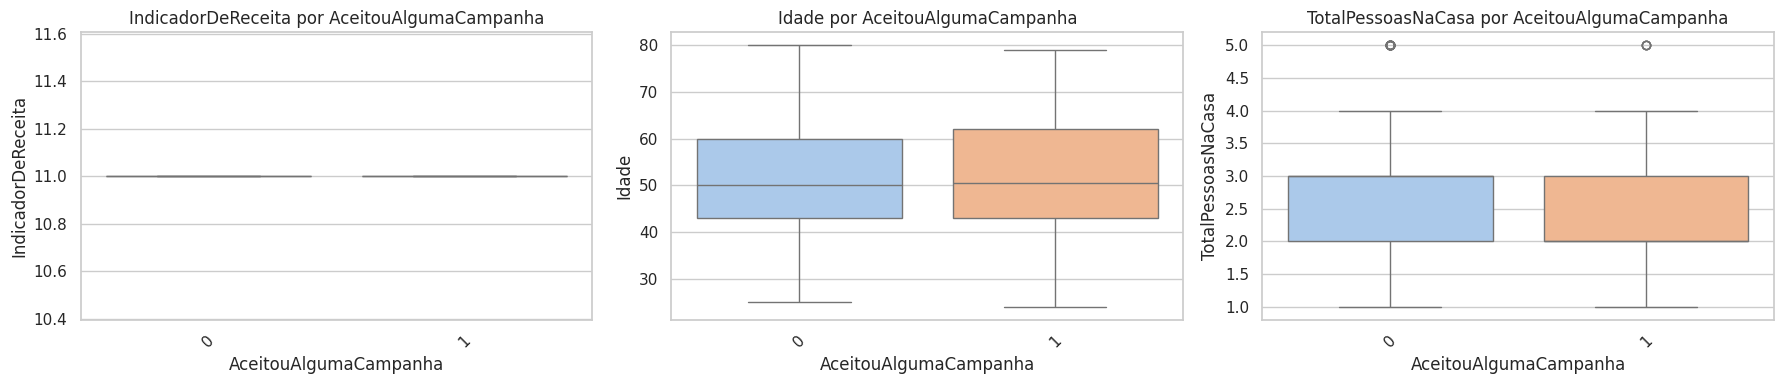

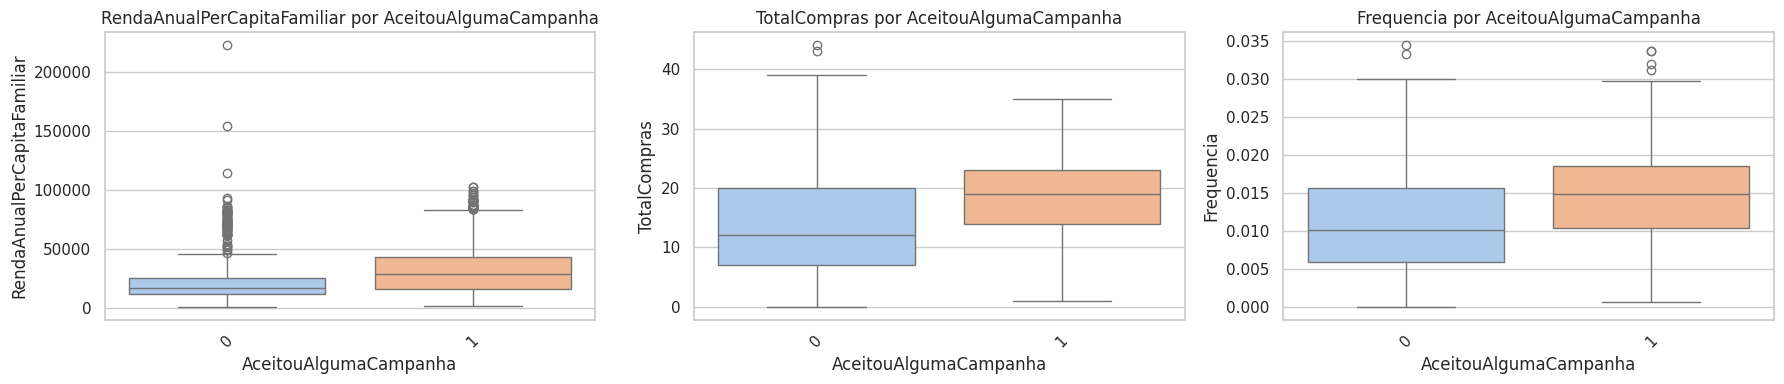

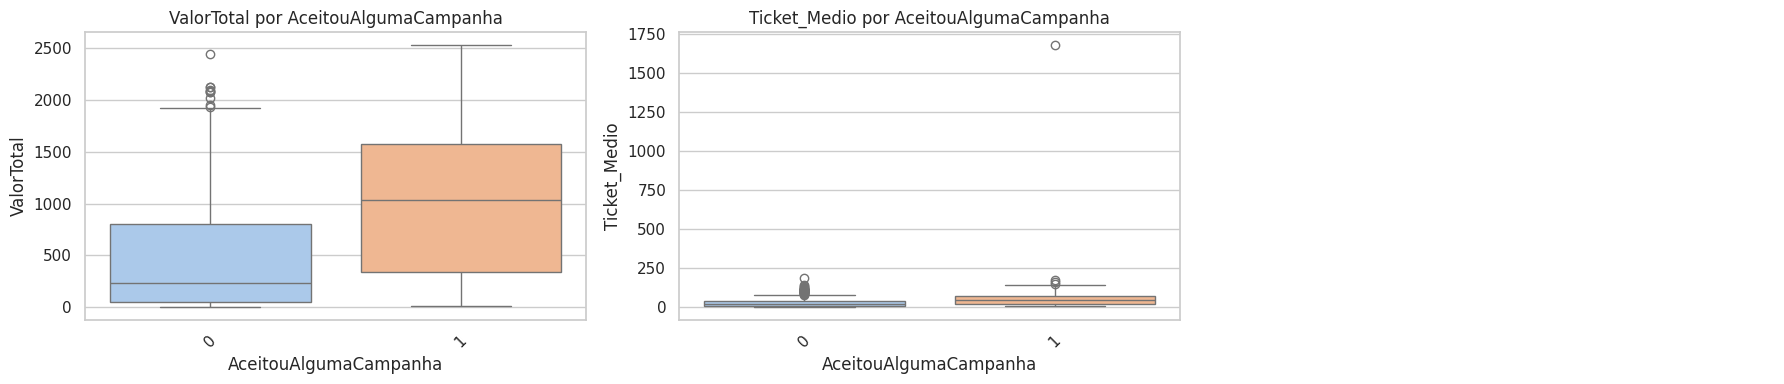

In [44]:
import math
# Variáveis de interesse
target = 'AceitouAlgumaCampanha'
categorical_vars = df2.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df2.select_dtypes(exclude=['object', 'category']).columns.tolist()

# Remove o target da lista de variáveis categóricas
if target in numerical_vars:
    numerical_vars.remove(target)
# --------------------
# Execução das análises
# --------------------

print("🔹 Análise Univariada - Variáveis Categóricas")
univariate_categorical(df2, categorical_vars)

print("🔹 Análise Univariada - Variáveis Numéricas")
univariate_numerical(df2, numerical_vars)

print("🔹 Análise Bivariada - Variáveis Categóricas vs Alvo")
bivariate_categorical_target(df2, categorical_vars, target)

print("🔹 Análise Bivariada - Variáveis Numéricas vs Alvo")
bivariate_numerical_target(df2, numerical_vars, target)

## Salvando novo dataframe para modelagem

In [45]:
df.to_parquet('../data/processed/df.parquet')